In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

from scipy.stats import norm
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm
from statsmodels.stats import diagnostic
from statsmodels.formula.api import ols
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler

import warnings
warnings.simplefilter('ignore')

In [2]:
Passing_Offense = pd.read_csv(r'C:\Users\danie\Documents\data_analytics_bootcamp\Passing_Offensec.csv')
Rushing_Offense = pd.read_csv(r'C:\Users\danie\Documents\data_analytics_bootcamp\Rushing_Offensec.csv')
Pass_Rush_off = pd.read_csv(r'C:\Users\danie\Documents\data_analytics_bootcamp\Passing_Rush_Offensec.csv')

In [3]:
Passing_Offense.drop('Unnamed: 0', inplace=True, axis = 1) 

In [4]:
corr = Passing_Offense.corr()
corr

,Att,Cmp,Cmp_%,Yds/Att,Pass_Yds,TD,INT,Rate,1st,1st%,20+,40+,Lng,Sck,SckY,Years
Att,1.000000,0.886392,0.284018,0.064923,0.746609,0.415082,0.160133,0.184537,0.758306,0.150613,0.443188,0.212125,0.024495,-0.102412,-0.041294,0.281686
Cmp,0.886392,1.000000,0.692329,0.379772,0.876479,0.609445,-0.086522,0.543398,0.891729,0.464920,0.559105,0.326630,0.064023,-0.191608,-0.126630,0.411624
Cmp_%,0.284018,0.692329,1.000000,0.697310,0.658495,0.616139,-0.426344,0.848112,0.669310,0.737767,0.474594,0.349701,0.089251,-0.230133,-0.189357,0.418437
Yds/Att,0.064923,0.379772,0.697310,1.000000,0.707900,0.686610,-0.371279,0.852563,0.615306,0.874423,0.767733,0.649293,0.255063,-0.227443,-0.206046,0.224692
Pass_Yds,0.746609,0.876479,0.658495,0.707900,1.000000,0.753358,-0.132139,0.692664,0.946278,0.685781,0.827031,0.585079,0.193886,-0.224735,-0.169016,0.342803
TD,0.415082,0.609445,0.616139,0.686610,0.753358,1.000000,-0.294867,0.827346,0.746415,0.712150,0.665965,0.531594,0.199972,-0.356597,-0.309935,0.249759
INT,0.160133,-0.086522,-0.426344,-0.371279,-0.132139,-0.294867,1.000000,-0.654514,-0.144590,-0.381989,-0.140786,-0.160501,-0.052916,0.142744,0.156261,-0.292460
Rate,0.184537,0.543398,0.848112,0.852563,0.692664,0.827346,-0.654514,1.000000,0.672265,0.842861,0.630170,0.522807,0.181295,-0.302913,-0.272095,0.365549
1st,0.758306,0.891729,0.669310,0.615306,0.946278,0.746415,-0.144590,0.672265,1.000000,0.754372,0.707497,0.416650,0.089967,-0.269130,-0.217140,0.327903
1st%,0.150613,0.464920,0.737767,0.874423,0.685781,0.712150,-0.381989,0.842861,0.754372,1.000000,0.627959,0.418989,0.103717,-0.304727,-0.284661,0.219127


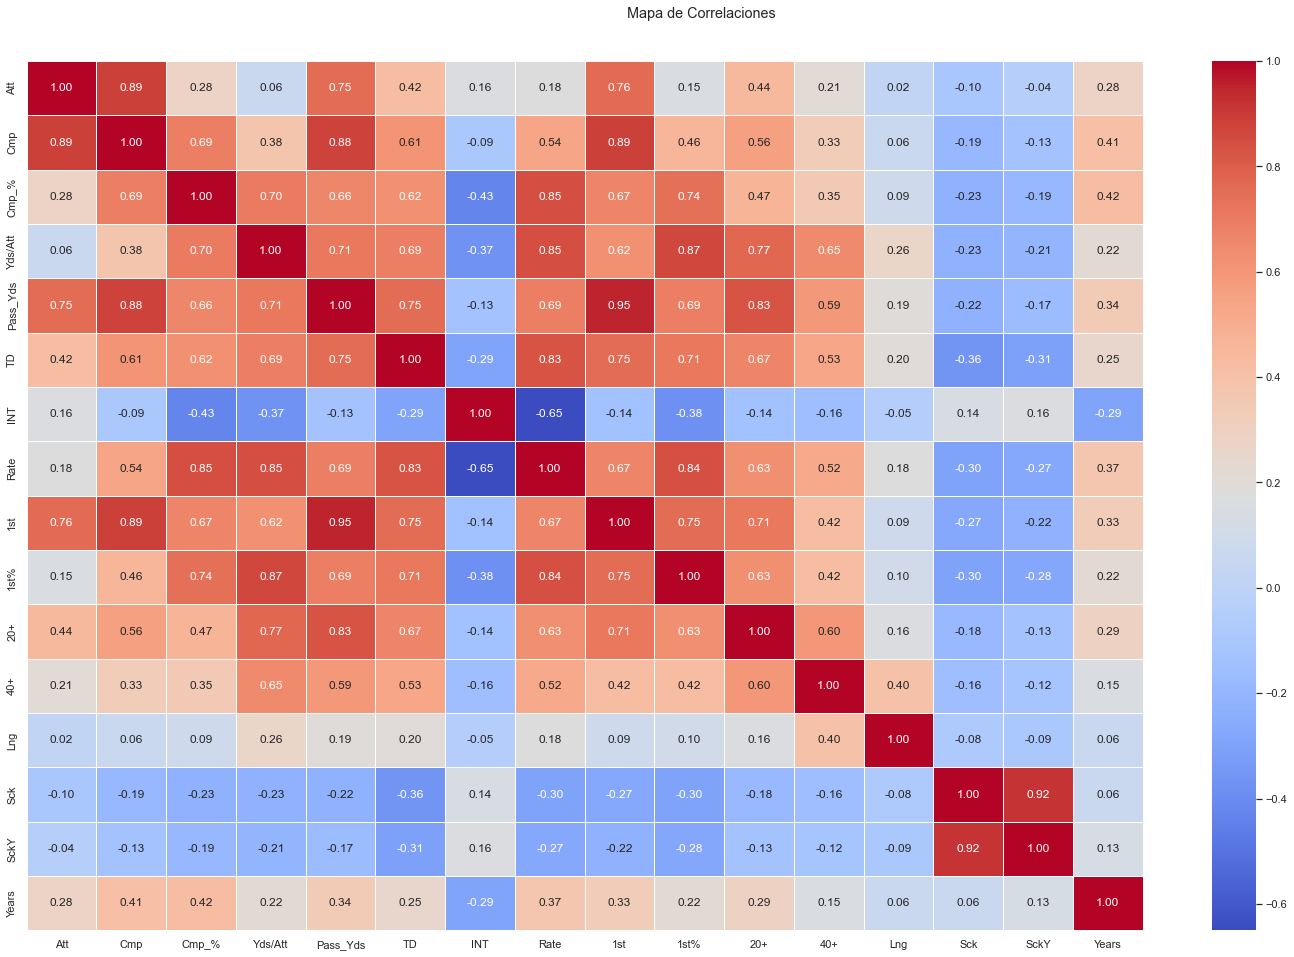

In [5]:
sns.set()

fig, ax = plt.subplots(figsize=(25, 15))
sns.heatmap(round(corr, 2), annot=True, ax=ax, cmap='coolwarm',
            fmt='.2f', linewidths=0.5)
fig.subplots_adjust(top=0.93)
fig.suptitle('Mapa de Correlaciones');

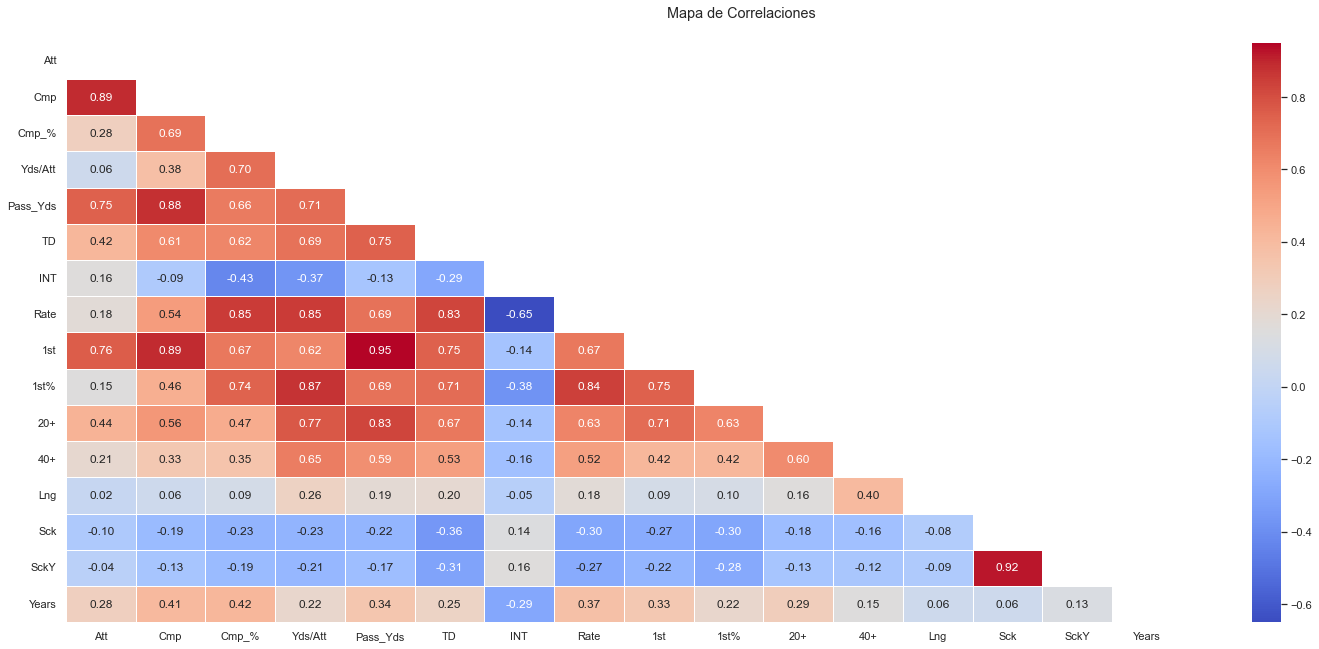

In [6]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(25, 10))
    sns.heatmap(round(corr, 2), annot=True, ax=ax, cmap='coolwarm',
              fmt='.2f', linewidths=0.5, mask=mask)
    fig.subplots_adjust(top=0.93)
    fig.suptitle('Mapa de Correlaciones')

In [7]:
n_columnas = 7
columnas = corr.nlargest(n_columnas, 'TD')['TD'].index
columnas

Index(['TD', 'Rate', 'Pass_Yds', '1st', '1st%', 'Yds/Att', '20+'], dtype='object')

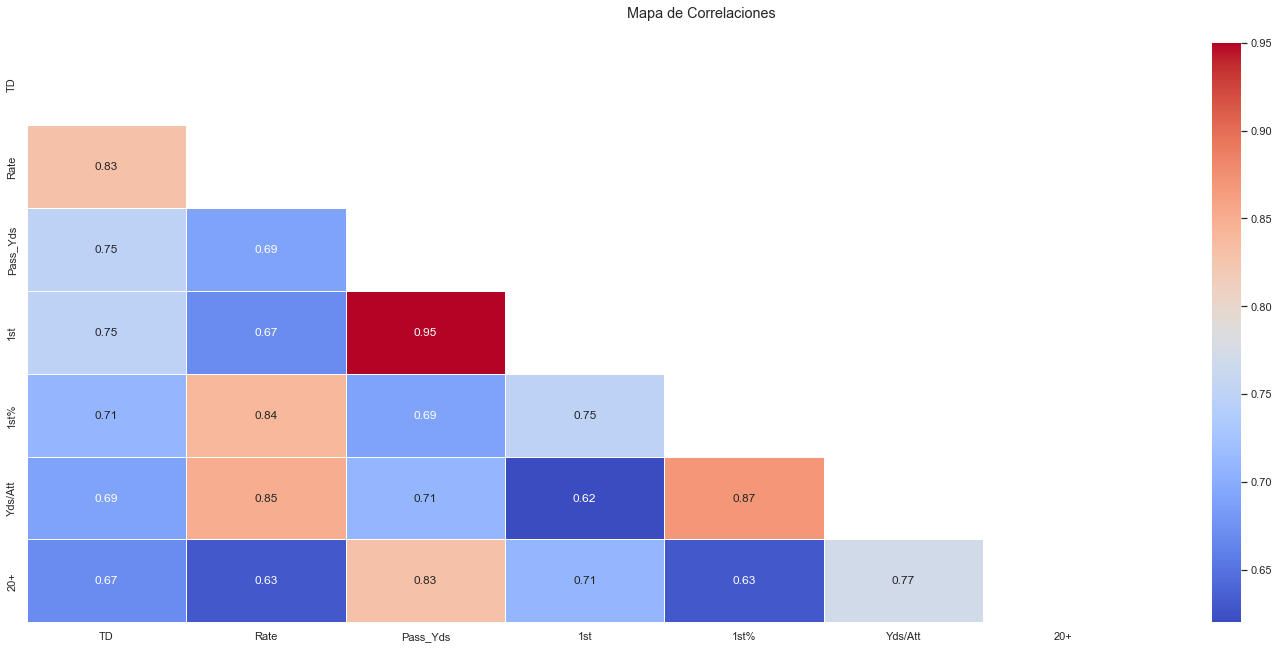

In [8]:
correlaciones = Passing_Offense[columnas].corr()
def mapa_de_calor(corr):
  """Gráfica un mapa de calor de correlaciones escondiendo
  el triángulo superior."""
  mask = np.zeros_like(corr)
  mask[np.triu_indices_from(mask)] = True
  with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(25, 10))
    sns.heatmap(round(corr, 2), annot=True, ax=ax, cmap='coolwarm',
                fmt='.2f', linewidths=0.5, mask=mask)
    fig.subplots_adjust(top=0.93)
    fig.suptitle('Mapa de Correlaciones')
mapa_de_calor(correlaciones)

(0.08066580163551151, 0.0009999999999998899)


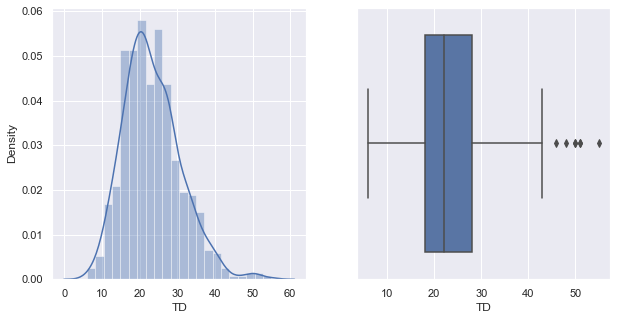


(0.028891602614357748, 0.22851980278382786)


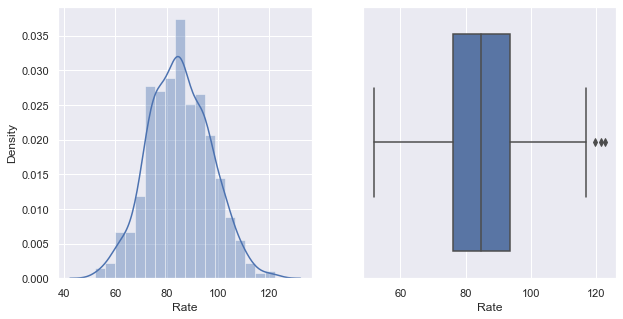


(0.03377474385950929, 0.07690143404833791)


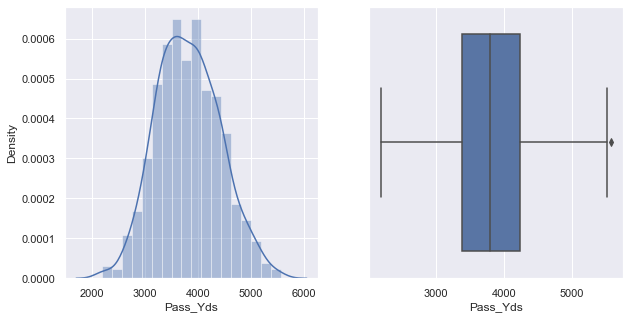


(0.028884033197161152, 0.22877932478417984)


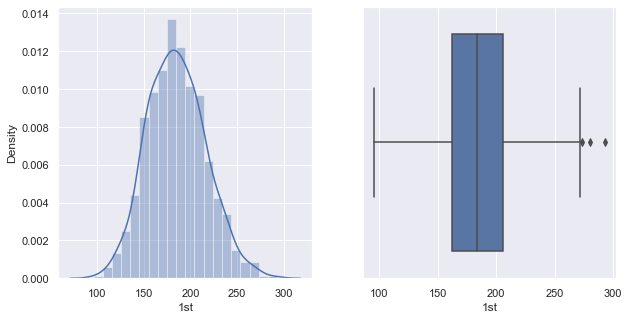


(0.025584835688924223, 0.4100650148165731)


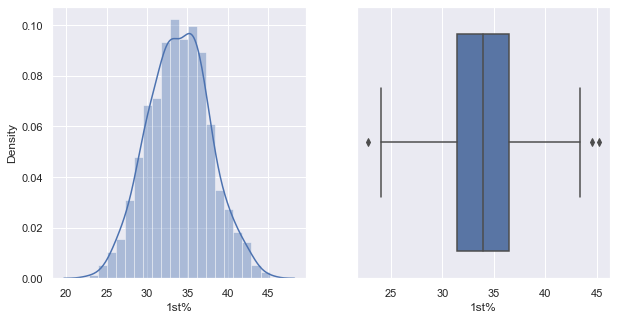


(0.05207866852102022, 0.0009999999999998899)


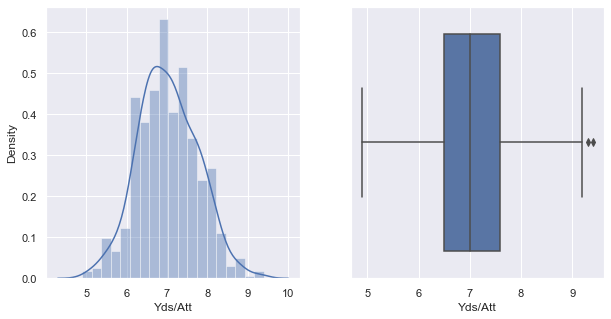


(0.062734330753282, 0.0009999999999998899)


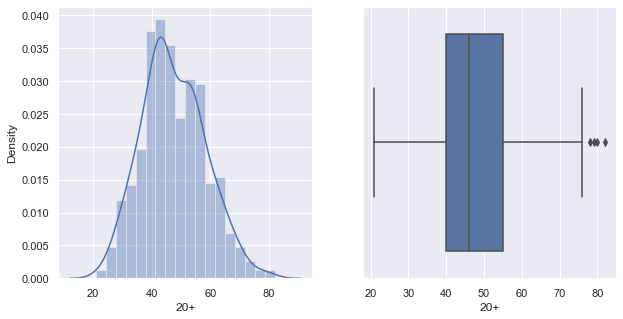

In [9]:
for columna in Passing_Offense[columnas]:
  fig, ax = plt.subplots(1, 2, figsize=(10, 5))
  sns.distplot(Passing_Offense[columna], kde=True, ax=ax[0])
  sns.boxplot(Passing_Offense[columna], orient='h', ax=ax[1])
  print(diagnostic.kstest_normal(Passing_Offense[columna]))
  plt.show()
  print('');

In [10]:
columnas2 = columnas
columnas2 = columnas2.drop('1st%')
columnas2 = columnas2.drop('Pass_Yds')
columnas2

Index(['TD', 'Rate', '1st', 'Yds/Att', '20+'], dtype='object')

In [11]:
Passing_Offense2 = Passing_Offense[columnas2]
Passing_Offense2['Cmp_%'] = Passing_Offense['Cmp_%']
Passing_Offense2

,TD,Rate,1st,Yds/Att,20+,Cmp_%
0,18,77.0,185,6.9,43,61.1
1,18,76.2,144,6.5,38,54.7
2,21,75.5,168,6.3,26,60.7
3,32,97.0,211,7.5,61,62.8
4,19,61.8,156,6.1,41,53.8
...,...,...,...,...,...,...
685,16,75.5,180,6.7,40,61.3
686,14,68.5,174,6.0,36,58.1
687,36,91.3,236,6.8,51,63.4
688,21,84.4,209,7.0,54,64.8


In [12]:
corr = Passing_Offense2.corr()
corr

,TD,Rate,1st,Yds/Att,20+,Cmp_%
TD,1.000000,0.827346,0.746415,0.686610,0.665965,0.616139
Rate,0.827346,1.000000,0.672265,0.852563,0.630170,0.848112
1st,0.746415,0.672265,1.000000,0.615306,0.707497,0.669310
Yds/Att,0.686610,0.852563,0.615306,1.000000,0.767733,0.697310
20+,0.665965,0.630170,0.707497,0.767733,1.000000,0.474594
Cmp_%,0.616139,0.848112,0.669310,0.697310,0.474594,1.000000


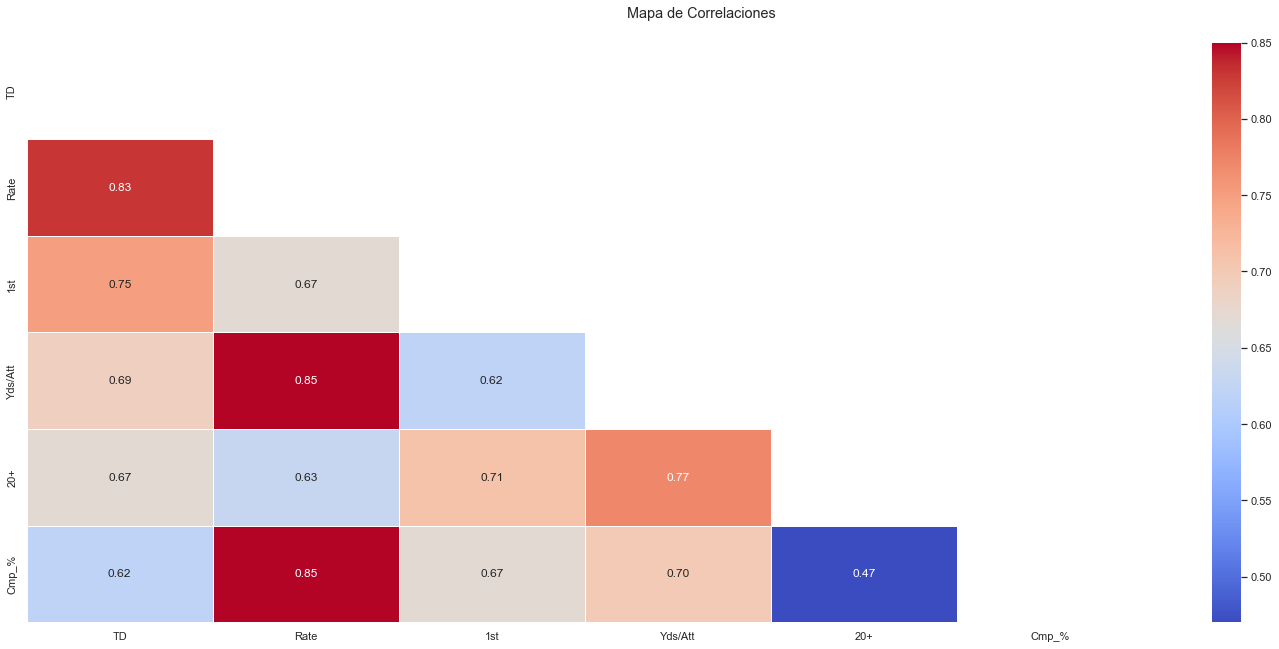

In [13]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(25, 10))
    sns.heatmap(round(corr, 2), annot=True, ax=ax, cmap='coolwarm',
              fmt='.2f', linewidths=0.5, mask=mask)
    fig.subplots_adjust(top=0.93)
    fig.suptitle('Mapa de Correlaciones')

In [14]:
X = Passing_Offense[columnas].drop('TD', axis=1)
y = Passing_Offense['TD']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# model = LinearRegression()
# model.fit(X_train, y_train)

X = sm.add_constant(X_train) #statsmode

y = y_train




In [16]:
model = LinearRegression()
model.fit(X_train, y_train) #sklearn

LinearRegression()

In [17]:
intercept = model.intercept_
intercept

-15.07257292374991

In [18]:
coef = model.coef_
coef

array([ 0.47845447, -0.0046699 ,  0.16370526, -0.62006772, -0.11939564,
        0.15404673])

In [19]:
modelo = sm.OLS(y, X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                     TD   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     315.7
Date:                Fri, 13 May 2022   Prob (F-statistic):          9.74e-174
Time:                        12:51:23   Log-Likelihood:                -1494.8
No. Observations:                 552   AIC:                             3004.
Df Residuals:                     545   BIC:                             3034.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -15.0726      1.799     -8.379      0.0

In [20]:
model.score(X_train,y_train)

0.7765853785918726

In [21]:
X = Passing_Offense2[columnas2].drop('TD', axis=1)
y = Passing_Offense2['TD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# model = LinearRegression()
# model.fit(X_train, y_train)

X = sm.add_constant(X_train)

y = y_train



In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

modelo = sm.OLS(y, X).fit()
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:                     TD   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     455.3
Date:                Fri, 13 May 2022   Prob (F-statistic):          1.80e-172
Time:                        12:51:24   Log-Likelihood:                -1494.5
No. Observations:                 552   AIC:                             2999.
Df Residuals:                     547   BIC:                             3021.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.8346      1.728     -8.586      0.0

In [23]:
X_train.head()

,Rate,1st,Yds/Att,20+
183,74.4,132,6.5,34
186,78.7,187,7.2,50
342,88.7,234,7.9,69
296,58.1,168,5.9,39
383,76.7,158,6.8,42


In [24]:
y_train_predict = model.predict(X_train)

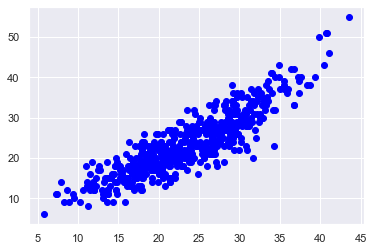

In [25]:
sns.set()
plt.scatter(y_train_predict, y_train, c='blue');

In [26]:
df_y = pd.DataFrame(zip(y_train.values.flatten(), y_train_predict.flatten()),
                    columns=['y_observada', 'y_predicha'])
df_y.head(10)

,y_observada,y_predicha
0,16,14.260826
1,17,20.358176
2,27,29.217515
3,16,11.512348
4,13,17.446110
5,21,21.857426
6,19,22.441845
7,17,19.102350
8,19,21.046645
9,16,22.020247


In [27]:
df_y['error'] = df_y['y_observada'] - df_y['y_predicha']
df_y.head()

,y_observada,y_predicha,error
0,16,14.260826,1.739174
1,17,20.358176,-3.358176
2,27,29.217515,-2.217515
3,16,11.512348,4.487652
4,13,17.446110,-4.446110


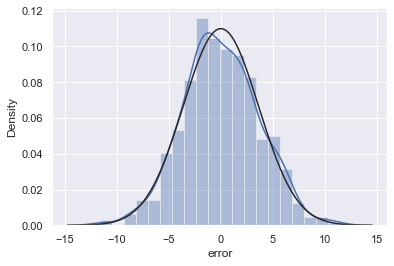

In [28]:
sns.distplot(df_y['error'], fit=norm);

In [29]:
model.score(X_train, y_train)

0.769035071039

In [30]:
mean_squared_error(y_train_predict, y_train)

13.156431786860855

In [31]:
mean_absolute_percentage_error(y_train_predict, y_train)

0.13147243891551338

In [32]:
y_test_predict = model.predict(X_test)

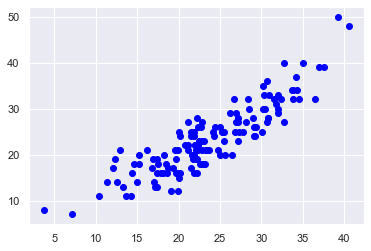

In [33]:
sns.set()
plt.scatter(y_test_predict, y_test, c='blue');

In [34]:
df_yt = pd.DataFrame(zip(y_test.values.flatten(), y_test_predict.flatten()),
                    columns=['y_observada', 'y_predicha'])
df_yt.head(10)

,y_observada,y_predicha
0,13,13.332788
1,21,12.873802
2,30,28.511532
3,18,14.579199
4,21,23.696610
5,24,21.532470
6,14,12.524541
7,25,25.502505
8,26,29.155890
9,28,22.267696


In [35]:
df_yt['error'] = df_yt['y_observada'] - df_yt['y_predicha']
df_yt.head()

,y_observada,y_predicha,error
0,13,13.332788,-0.332788
1,21,12.873802,8.126198
2,30,28.511532,1.488468
3,18,14.579199,3.420801
4,21,23.696610,-2.696610


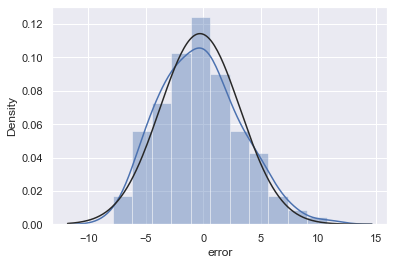

In [36]:
sns.distplot(df_yt['error'], fit=norm);

In [37]:
model.score(X_test, y_test)

0.7831582835561696

In [38]:
mean_squared_error(y_test_predict, y_test)

12.269854849183815

In [39]:
mean_absolute_percentage_error(y_test_predict, y_test)

0.13399736566468134

In [40]:
################################### ESTANDARIZACION 

In [41]:
scaler = StandardScaler()
Passing_Offense_stand = Passing_Offense[columnas2]
Passing_Offense_stand = pd.DataFrame(scaler.fit_transform(Passing_Offense_stand))
Passing_Offense_stand
#Passing_Offense[columnas]

,0,1,2,3,4
0,-0.706729,-0.676171,-0.007633,-0.167439,-0.415577
1,-0.706729,-0.742702,-1.324265,-0.707310,-0.879270
2,-0.308978,-0.800917,-0.553553,-0.977246,-1.992134
3,1.149443,0.987107,0.827305,0.642369,1.253719
4,-0.574145,-1.940262,-0.938909,-1.247182,-0.601054
...,...,...,...,...,...
685,-0.971896,-0.800917,-0.168198,-0.437374,-0.693793
686,-1.237063,-1.383064,-0.360875,-1.382150,-1.064747
687,1.679777,0.513073,1.630129,-0.302406,0.326333
688,-0.308978,-0.060758,0.763079,-0.032471,0.604549


In [42]:
X = Passing_Offense_stand.drop(0, axis=1)
y = Passing_Offense_stand[0]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# model = LinearRegression()
# model.fit(X_train, y_train)

X = sm.add_constant(X_train) #statsmode

y = y_train


In [44]:
model = LinearRegression()
model.fit(X_train, y_train)

modelo = sm.OLS(y, X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     487.0
Date:                Fri, 13 May 2022   Prob (F-statistic):          1.20e-178
Time:                        12:51:27   Log-Likelihood:                -349.98
No. Observations:                 552   AIC:                             710.0
Df Residuals:                     547   BIC:                             731.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0039      0.020     -0.198      0.8

In [45]:
y_test_predict = model.predict(X_test)

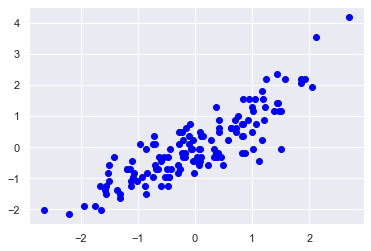

In [46]:
sns.set()
plt.scatter(y_test_predict, y_test, c='blue');

In [47]:
df_yt = pd.DataFrame(zip(y_test.values.flatten(), y_test_predict.flatten()),
                    columns=['y_observada', 'y_predicha'])
df_yt.head(10)

,y_observada,y_predicha
0,0.619108,0.720344
1,0.088773,-0.726517
2,0.353941,0.825036
3,0.884275,1.204843
4,-0.706729,-0.255423
5,-0.176394,-0.181548
6,-0.706729,-1.140907
7,-1.502230,-1.549884
8,-0.574145,0.232572
9,4.198867,2.688600


In [48]:
df_yt['error'] = df_yt['y_observada'] - df_yt['y_predicha']
df_yt.head()

,y_observada,y_predicha,error
0,0.619108,0.720344,-0.101236
1,0.088773,-0.726517,0.815290
2,0.353941,0.825036,-0.471095
3,0.884275,1.204843,-0.320568
4,-0.706729,-0.255423,-0.451306


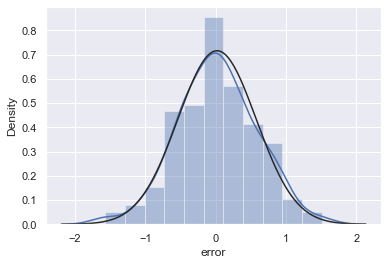

In [49]:
sns.distplot(df_yt['error'], fit=norm);

In [50]:
model.score(X_test, y_test)

0.7418766443676506

In [51]:
mean_squared_error(y_test_predict, y_test)

0.3105961979178443

In [52]:
mean_absolute_percentage_error(y_test_predict, y_test)

2.0862022761122874